# Bifurcations

## bifurcation analysis - continuous time

1. Find the equilibrium points $x_{eq}$
2. Calculate the Jacobian matrix
3. Find the critical condition

the critical condition at which a bifurcation occurs in this system is given by

$$R\left(\frac{dF}{dx}\right)\bigg\rvert_{x=x_{eq}} = 0$$
---

Example

Consider $\frac{dx}{dt} = r - x^2$

1. Find $x_{eq}$

$$x_{eq} = \pm\sqrt{r}$$

2. Find the Jacobian matrix
$\frac{dF}{dx} = -2x$

3. Find the critical condition
$$\frac{dF}{dx}\biggr\rvert_{x=x_{eq}} = \pm2\sqrt{r} = 0$$

so $r = 0$


In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

In [2]:
xeq1 = lambda r: np.sqrt(r)
xeq2 = lambda r: -np.sqrt(r)

domain = np.linspace(0, 10)

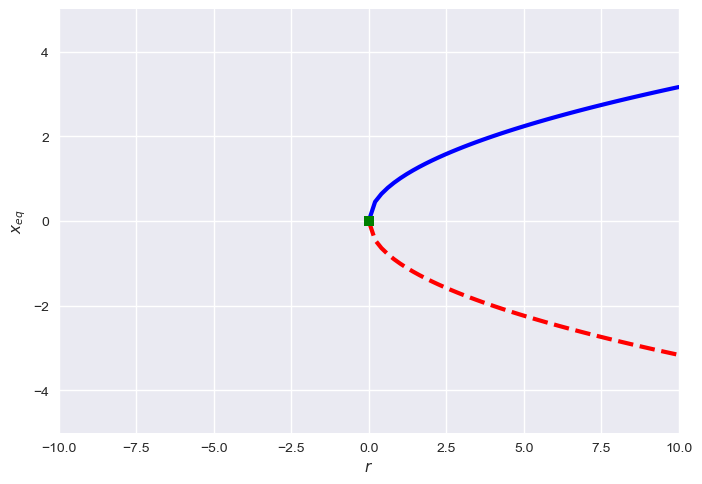

In [3]:
plt.plot(domain, xeq1(domain), 'b-', linewidth=3)
plt.plot(domain, xeq2(domain), 'r--', linewidth=3)
plt.plot([0], [0], 'gs')
plt.axis([-10, 10, -5, 5])
plt.xlabel('$r$')
plt.ylabel('$x_{eq}$')

plt.show()

## Bifurcations in 2-D Continuous-Time Models

Example:
$$\frac{d^2x}{dt^2} + r(x^2 - 1)\frac{dx}{dt} + x = 0$$

This is a second-order differential equation,  so we should introduce an additional variable: $y = dx/dt$

$$
\begin{align}
\frac{dx}{dt} &= y\\
\frac{dy}{dt} &= -r(x^2 - 1)y - x
\end{align}
$$

1. equilibrium point is $(0, 0)$
2.  Jacobian matrix of this system at the equilibrium point
$$
\begin{bmatrix}
0 & 1\\
-2rxy-1 & -r(x^2 - 1)
\end{bmatrix}\bigg\rvert_{(x, y)=(0, 0)}
=
\begin{bmatrix}
0 & 1\\
-1 & r
\end{bmatrix}
$$

3. Find the eigenvalues of the Jacobian matrix

$$
\begin{vmatrix}
0 - \lambda& 1\\
-1 & r - \lambda
\end{vmatrix} = 0$$

So:

$$\lambda = \frac{r\pm\sqrt{r^2 - 1}}{2}$$

$$Re(\lambda) = 
\begin{cases}
    \frac{r\pm\sqrt{r^2 - 4}}{2} & \text{if } r^2\geq 4\\
    \frac{r}{2} & \text{if } r^2 < 4
\end{cases}$$

In [4]:
Dt = 0.01

def initialize():
    global x, xrest, y, yrest
    x = y = 0.1
    xrest = [x]
    yrest = [y]
    
def observe():
    global x, xrest, y, yrest
    xrest.append(x)
    yrest.append(y)
    
def update():
    global x, xrest, y, yrest
    nextx = x + y * Dt
    nexty = y + (-r * (x**2 - 1) * y - x) * Dt
    
    x, y = nextx, nexty
    
def plot_phase_space(r):
    initialize()
    for t in range(10000):
        update()
        observe()
        
    plt.plot(xrest, yrest)
    plt.axis('image')
    plt.axis([-3, 3, -3, 3])
    plt.title('r = ' + str(r))

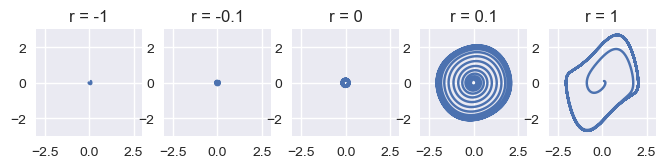

In [5]:
rs = [-1, -0.1, 0, 0.1, 1]

for i in range(len(rs)):
    plt.subplot(1, len(rs), i + 1)
    r = rs[i]
    plot_phase_space(r)

## Bifurcations in Discrete-Time Models

$x_t = F(x_{t-1})$

The critical condition at
which a bifurcation occurs is given by

$$\left\lvert \frac{dF}{dx}\right\rvert_{x=x_{eq}} = 1$$

Example

$$x_t = x_{t-1} + r - r^2_{x-t}$$

Equlibrium points:

$$x_{eq} = \pm\sqrt{r}$$

we calculate $dF/dx$ as follows:

$$\frac{dF}{dx} = (r + x - x^2)' = 1 - 2x$$

$$\left\lvert \frac{dF}{dx}\right\rvert_{x=\pm\sqrt{r}} = |1\pm2\sqrt{r}| = 1$$

In [6]:
def initialize():
    global x, result
    x = 0.1
    result = [x]
    
def observe():
    global x, result
    result.append(x)
    
def update():
    global x, result
    x = x + r - x ** 2
    
def plot_phase_space(r):
    initialize()
    for t in range(30):
        update()
        observe()
    plt.plot(result)
    plt.ylim(0, 2)
    plt.title('r = ' + str(r))

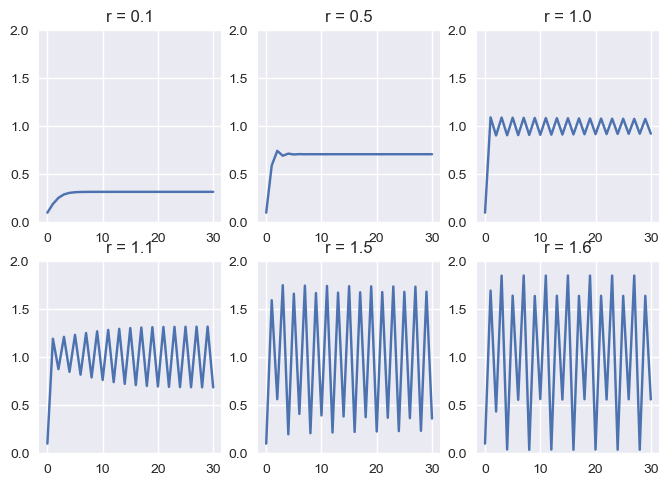

In [7]:
rs = [0.1, 0.5, 1.0, 1.1, 1.5, 1.6]

for i in range(len(rs)):
    plt.subplot(2, 3, i + 1)
    r = rs[i]
    plot_phase_space(r)
plt.show()

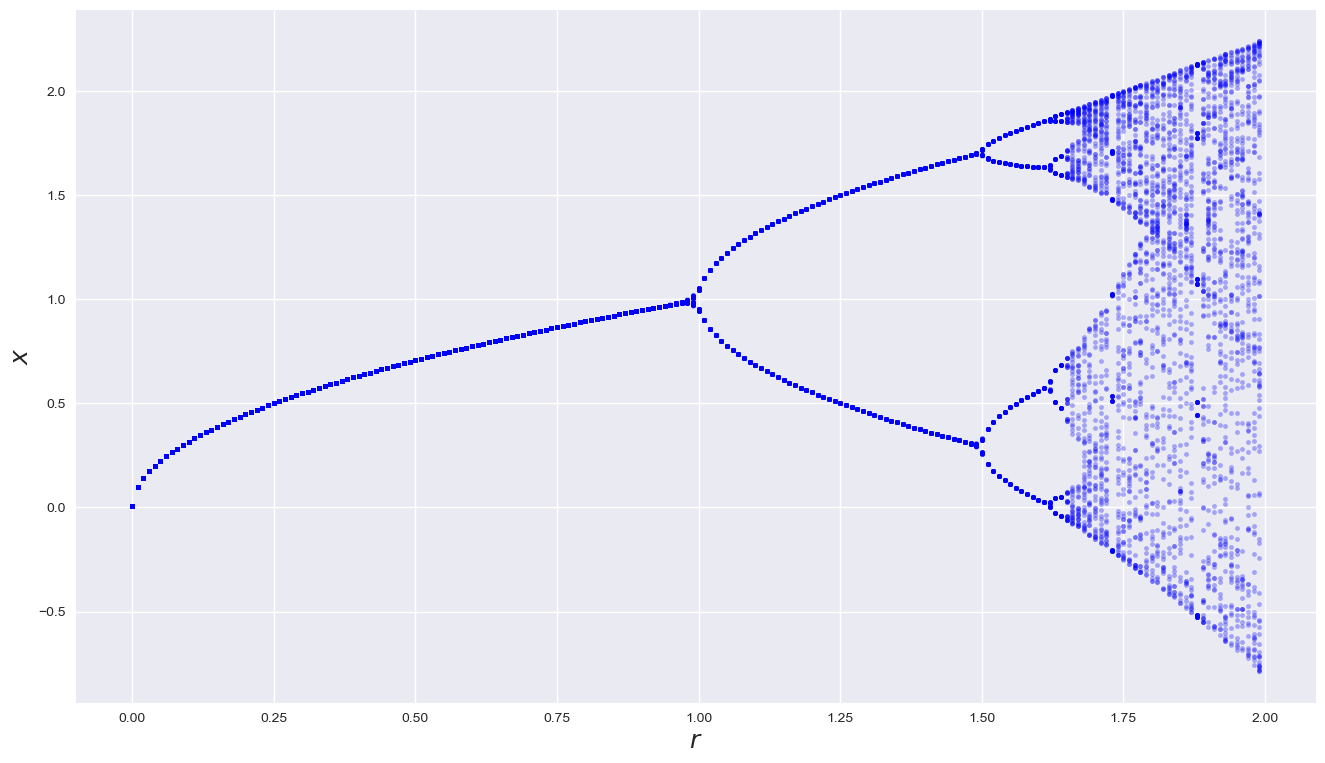

In [12]:
def initialize():
    global x, result
    x = 0.1
    result = []
    
def observe():
    global x, result
    result.append(x)
    
def update():
    global x, result
    x = x + r - x ** 2

def plot_asymptotic_states(r):
    initialize()
    for _ in range(100): # first 100 steps are discarded
        update()
    for _ in range(100): # second 100 steps are collected
        update()
        observe()
    plt.plot([r] * 100, result, 'b.', alpha = 0.3)

plt.figure(figsize=(16, 9))
for r in np.arange(0, 2, 0.01):
    plot_asymptotic_states(r)
    
plt.xlabel('$r$', fontsize=18)
plt.ylabel('$x$', fontsize=18)
plt.show()

# Chaos

- is a long-term behavior of a nonlinear dynamical system that never falls in any static or periodic trajectories.
- looks like a random fluctuation, but still occurs in completely deterministic, simple dynamical systems.
- exhibits sensitivity to initial conditions.
- occurs when the period of the trajectory of the system’s state diverges to infinity.
- occurs when no periodic trajectories are stable.
- is a prevalent phenomenon that can be found everywhere in nature, as well as in social and engineered environments.

In [32]:
def initialize(init_x = 0.1):
    global x, result
    x = init_x
    result = [x]
    
def observe():
    global x, result
    result.append(x)
    
def update():
    global x, result
    x = x + r - x ** 2
    
def plot_asymptotic_behaviour(r, init_x = 0.1, symb = 'b-'):
    initialize(init_x)
    for _ in range(100): 
        update()
        observe()
    plt.plot(range(101), result, symb, alpha = 0.5, label = f'$x_0 = {init_x}$')

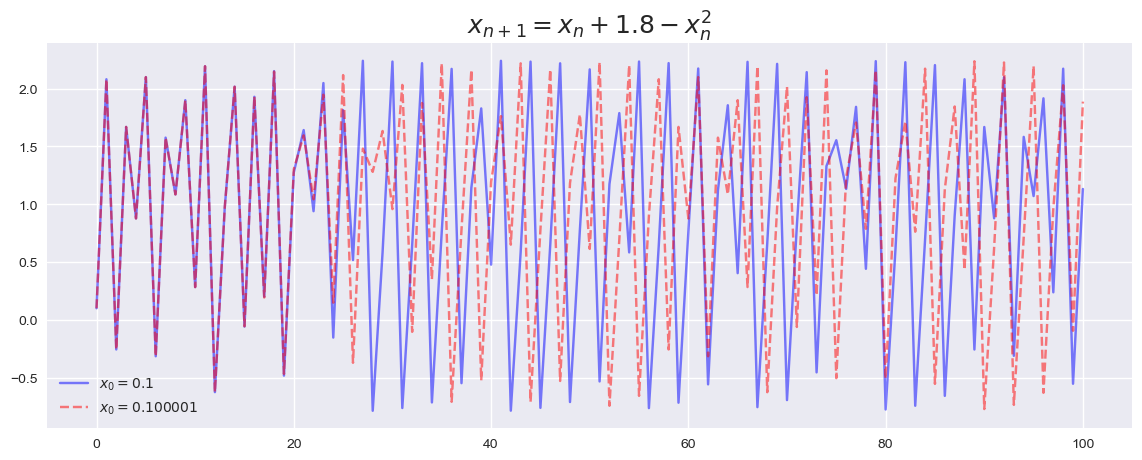

In [37]:
plt.figure(figsize=(14, 5))
plot_asymptotic_behaviour(1.8, init_x = 0.1, symb = 'b-')
plot_asymptotic_behaviour(1.8, init_x = 0.100001, symb = 'r--')
plt.title('$x_{n+1} = x_n + 1.8 - x_n^2$', fontsize=18)
plt.legend();
plt.savefig('chaotic.png')

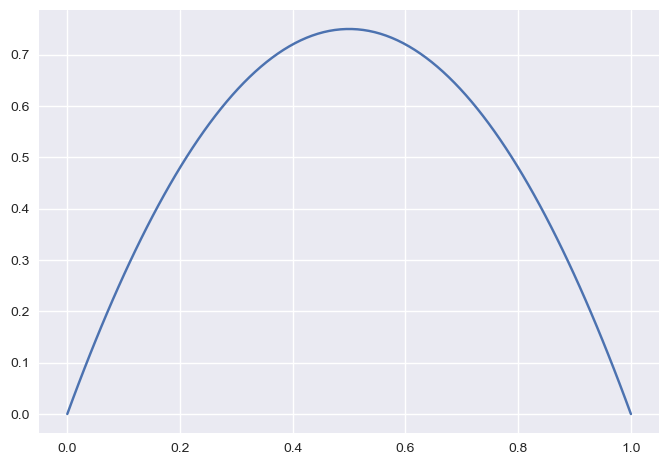

In [46]:
x = np.linspace(0, 1, 100)
y = lambda x: 3 * x * (1 - x)

plt.plot(x, y(x));

## Lyapunov exponent
which measures how quickly an infinitesimally small distance between two initially close states grows over time:


$$\lvert F^t(x_0+\epsilon) - F^t(x_0)\rvert\approx \epsilon e^{\lambda t}$$

Simply 

$$\lambda = \lim_{t\to \infty} \sum_{i=0}^{t-1} \log \left\lvert \frac{dF}{dx}\bigg\rvert_{x=x_i} \right\rvert$$
The Lyapunov exponent is a time average of $\log |dF/dx|$ at every state the system visits over the course of the simulation.

If $\lambda > 0$, small distances grow indefinitely over time, which means the stretching
mechanism is in effect.

In [47]:
from math import log

In [96]:
log_dFdx = lambda x: np.log(abs(1 - 2 * x))

def initialize():
    global x, rest
    x = 0.1
    rest = [log_dFdx(x)]
    
def observe():
    global x, rest
    rest.append(log_dFdx(x))
    
def update():
    global x, rest
    x = x + r - x ** 2

def lyapunov_exponent():
    initialize()
    for _ in range(100):
        update()
        observe()
    return np.mean(rest)

In [108]:
rvalues = np.arange(0, 2, 0.01)
lambdas = []
for ri in rvalues:
    r = ri
    l = lyapunov_exponent()
    lambdas.append(l)

C:\Users\User\AppData\Local\Temp/ipykernel_15272/2746781386.py:1: RuntimeWarning: divide by zero encountered in log
  log_dFdx = lambda x: np.log(abs(1 - 2 * x))


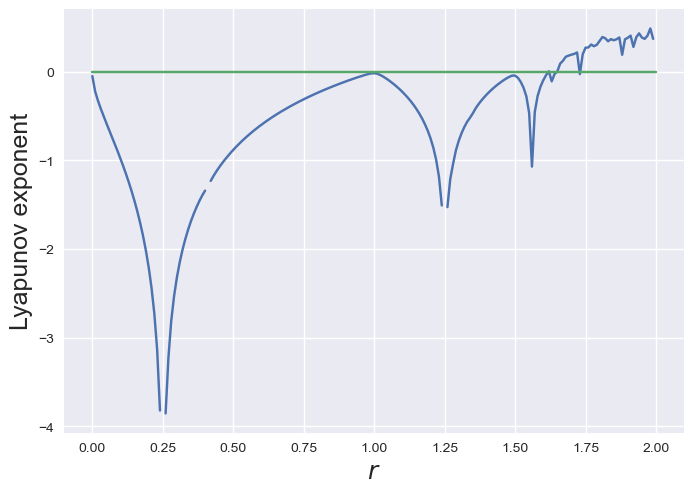

In [109]:
plt.plot(rvalues, lambdas)
plt.plot([0, 2], [0, 0])
plt.xlabel('$r$', fontsize=18)
plt.ylabel('Lyapunov exponent', fontsize=18)
plt.show()

## Chaos in Continuous-Time Models

*Lorenz equations*

$$
\begin{align}
\frac{dx}{dt} &= s(y - x)\\
\frac{dy}{dt} &= rx - y - xz\\
\frac{dz}{dt} &= xy - bz\\
\end{align}
$$

In [110]:
from mpl_toolkits.mplot3d import Axes3D

In [122]:
s = 10.
r = 30.
b = 3.
Dt = 0.01

def initialize():
    global x, xresult, y, yresult, z, zresult, t, timesteps
    x = y = z = 1.
    xresult = [x]
    yresult = [y]
    zresult = [z]
    
    t = 0.
    timesteps = [t]
    
def update():
    global x, xresult, y, yresult, z, zresult, t, timesteps
    nextx = x + (s * (y - x)) * Dt
    nexty = y + (r * x - y - x * z) * Dt
    nextz = z + (x * y - b * z) * Dt
    x, y, z = nextx, nexty, nextz
    t = t + Dt
    
def observe():
    global x, xresult, y, yresult, z, zresult, t, timesteps
    xresult.append(x)
    yresult.append(y)
    zresult.append(z)
    timesteps.append(t)

In [123]:
initialize()
while t < 30.:
    update()
    observe()

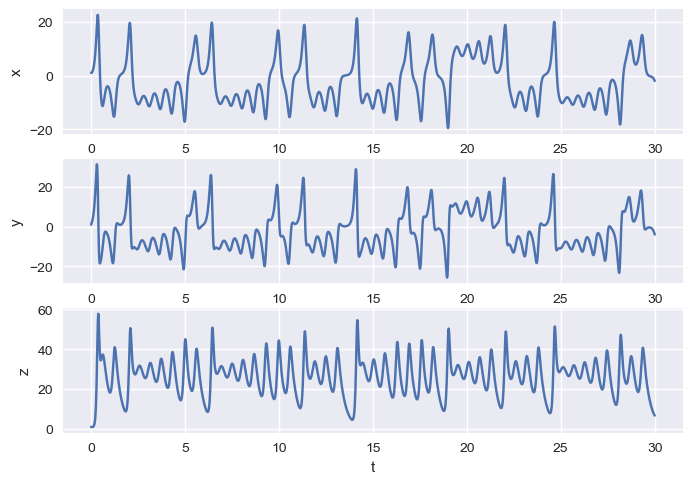

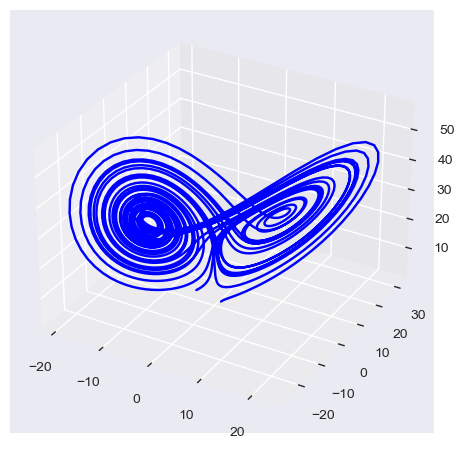

In [128]:
plt.subplot(3, 1, 1)
plt.plot(timesteps, xresult)
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(3, 1, 2)
plt.plot(timesteps, yresult)
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(3, 1, 3)
plt.plot(timesteps, zresult)
plt.xlabel('t')
plt.ylabel('z')

plt.figure()
ax = plt.subplot(projection='3d')
ax.plot(xresult, yresult, zresult, 'b')
plt.show()